# 逻辑回归 Logistic Regression

## 准备数据

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from sklearn.metrics import classification_report

In [2]:
path = 'src/dataAdmission1.txt'
data = pd.read_csv(path, header=None, names=['exam1','exam2', 'admitted'])
data.head()

,exam1,exam2,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [3]:
data.describe()

,exam1,exam2,admitted
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


创建两个分数的散点图，用颜色编码来可视化。

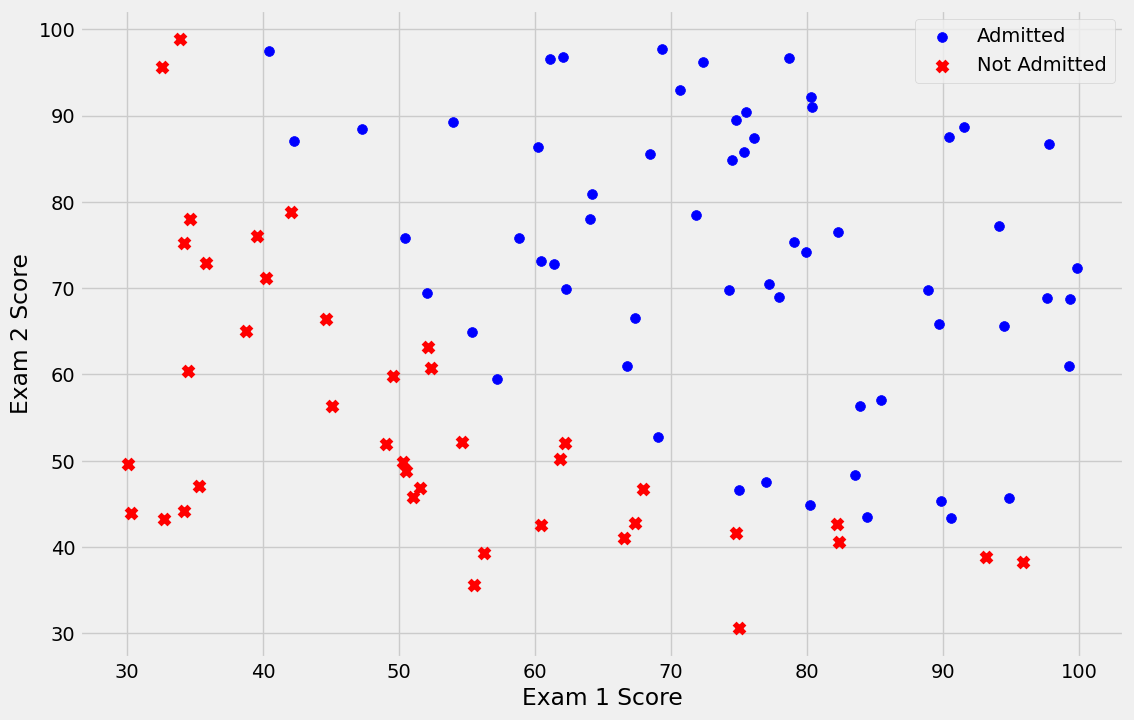

In [4]:
positive = data[data['admitted'].isin([1])]
negative = data[data['admitted'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['exam1'], positive['exam2'], s=50, c='b', marker='o', label='Admitted')
ax.scatter(negative['exam1'], negative['exam2'], s=50, c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')
plt.show()

In [5]:
def get_X(df):
    #     """
    #     use concat to add intersect feature to avoid side effect
    #     not efficient for big dataset though
    #     """
    ones = pd.DataFrame({'ones': np.ones(len(df))})
    data = pd.concat([ones, df],axis=1)
    return data.iloc[:,:-1].values

def get_y(df):
    return df.iloc[:,-1].values.flatten()

def normalize_feature(df):
    return df.apply(lambda column: (column - column.mean()) /column.std())


In [6]:
X=get_X(data)
print('X:', X.shape)

y = get_y(data)
print('y:', y.shape)

X: (100, 3)
y: (100,)


## Sigmoid函数

In [8]:
def sigmoid(z):
    return 1 / (1+z)